In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import holidays
import calendar
import math


plt.style.use('fivethirtyeight')
#Import training data
inputFilePath = "./input_training_ssnsrY0.csv"
data_train = pd.read_csv(inputFilePath, delimiter = ',', skiprows = 0, index_col=[0])

#Import testing data
inputFilePathTest = "./input_test_cdKcI0e.csv"
data_test = pd.read_csv(inputFilePathTest, delimiter = ',', skiprows = 0, index_col=[0])
id_test = data_test.index
# import targets
outputFilePath = "./output_training_Uf11I9I.csv"
targets = pd.read_csv(outputFilePath, delimiter = ',', skiprows = 0, index_col=[0])

#Remove useless datas
data_train = data_train.drop(["loc_1", "loc_2", "loc_secondary_1", "loc_secondary_2", "loc_secondary_3"], axis = 1)
data_test = data_test.drop(["loc_1", "loc_2", "loc_secondary_1", "loc_secondary_2", "loc_secondary_3"], axis = 1)

data_train.timestamp = pd.to_datetime(data_train.timestamp)
data_test.timestamp = pd.to_datetime(data_test.timestamp)

# holidays feature
fr_holidays = holidays.France()
data_train['isHoliday'] = data_train.timestamp.apply(lambda x:1 if x in fr_holidays else 0)
data_test['isHoliday'] = data_test.timestamp.apply(lambda x:1 if x in fr_holidays else 0)

# indexing with timestamp
data_test = data_test.set_index('timestamp')
data_train = data_train.set_index('timestamp')

# time features
def timefeatures(df):
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    df['quarter'] = df.index.quarter
    df['weekofyear'] = df.index.weekofyear
    df['dayofweek'] = df.index.dayofweek

    return df

data_train = timefeatures(data_train)
data_test = timefeatures(data_test)

# isWeekend feature
data_train['isWeekend'] = data_train['dayofweek'].apply(lambda x: 1 if x in [5,6] else 0)
data_test['isWeekend'] = data_test['dayofweek'].apply(lambda x: 1 if x in [5,6] else 0)

# smoothing temp and humidity
data_train['temp_1_smooth7D'] = data_train['temp_1'].interpolate().rolling(24*7).mean().fillna(method='bfill').round(decimals=1)
data_train['temp_2_smooth7D'] = data_train['temp_2'].interpolate().rolling(24*7).mean().fillna(method='bfill').round(decimals=1)
data_test['temp_1_smooth7D'] = data_test['temp_1'].interpolate().rolling(24*7).mean().fillna(method='bfill').round(decimals=1)
data_test['temp_2_smooth7D'] = data_test['temp_2'].interpolate().rolling(24*7).mean().fillna(method='bfill').round(decimals=1)

data_train['humidity_1_smooth7D'] = data_train['humidity_1'].interpolate().rolling(24*7).mean().fillna(method='bfill').round()
data_train['humidity_2_smooth7D'] = data_train['humidity_2'].interpolate().rolling(24*7).mean().fillna(method='bfill').round()
data_test['humidity_1_smooth7D'] = data_test['humidity_1'].interpolate().rolling(24*7).mean().fillna(method='bfill').round()
data_test['humidity_2_smooth7D'] = data_test['humidity_2'].interpolate().rolling(24*7).mean().fillna(method='bfill').round()

# concatenate features and targets
data_train = pd.concat([targets.set_index(data_train.index), data_train],axis=1)

C:\Users\mehdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [113]:
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,consumption_1,consumption_2,temp_1,temp_2,mean_national_temp,humidity_1,humidity_2,consumption_secondary_1,consumption_secondary_2,consumption_secondary_3,isHoliday,hour,month,year,dayofmonth,quarter,weekofyear,dayofweek,isWeekend,temp_1_smooth7D,temp_2_smooth7D,humidity_1_smooth7D,humidity_2_smooth7D
consumption_1,1.00,0.81,-0.24,-0.19,-0.38,0.05,-0.03,0.86,0.86,0.91,-0.07,0.17,-0.05,-0.24,-0.04,-0.05,-0.05,-0.31,-0.40,-0.42,-0.46,0.35,0.43
consumption_2,0.81,1.00,-0.43,-0.42,-0.55,0.17,0.13,0.74,0.80,0.79,-0.12,0.03,-0.32,-0.09,-0.02,-0.31,-0.32,-0.21,-0.25,-0.57,-0.61,0.39,0.44
temp_1,-0.24,-0.43,1.00,0.85,0.92,-0.63,-0.52,-0.11,-0.22,-0.15,-0.02,0.20,0.16,0.39,0.03,0.16,0.15,-0.03,-0.03,0.84,0.81,-0.65,-0.64
temp_2,-0.19,-0.42,0.85,1.00,0.86,-0.62,-0.71,-0.06,-0.18,-0.09,0.01,0.27,0.16,0.34,0.03,0.16,0.15,-0.00,0.00,0.78,0.80,-0.61,-0.63
mean_national_temp,-0.38,-0.55,0.92,0.86,1.00,-0.50,-0.45,-0.21,-0.34,-0.29,-0.00,0.07,0.20,0.42,0.06,0.19,0.18,-0.02,-0.02,0.96,0.94,-0.74,-0.73
humidity_1,0.05,0.17,-0.63,-0.62,-0.50,1.00,0.58,-0.01,0.04,-0.06,0.02,-0.36,0.11,-0.31,-0.06,0.10,0.12,-0.02,0.00,-0.40,-0.41,0.54,0.41
humidity_2,-0.03,0.13,-0.52,-0.71,-0.45,0.58,1.00,-0.09,-0.00,-0.13,-0.03,-0.37,0.05,-0.30,0.01,0.03,0.06,0.01,-0.01,-0.36,-0.40,0.35,0.46
consumption_secondary_1,0.86,0.74,-0.11,-0.06,-0.21,-0.01,-0.09,1.00,0.81,0.88,-0.10,0.09,-0.05,-0.10,-0.02,-0.04,-0.05,-0.42,-0.52,-0.24,-0.27,0.21,0.24
consumption_secondary_2,0.86,0.80,-0.22,-0.18,-0.34,0.04,-0.00,0.81,1.00,0.87,-0.15,0.12,-0.17,-0.11,-0.04,-0.19,-0.18,-0.33,-0.40,-0.36,-0.39,0.26,0.38
consumption_secondary_3,0.91,0.79,-0.15,-0.09,-0.29,-0.06,-0.13,0.88,0.87,1.00,-0.12,0.17,-0.14,-0.10,-0.03,-0.14,-0.14,-0.34,-0.43,-0.33,-0.36,0.23,0.30


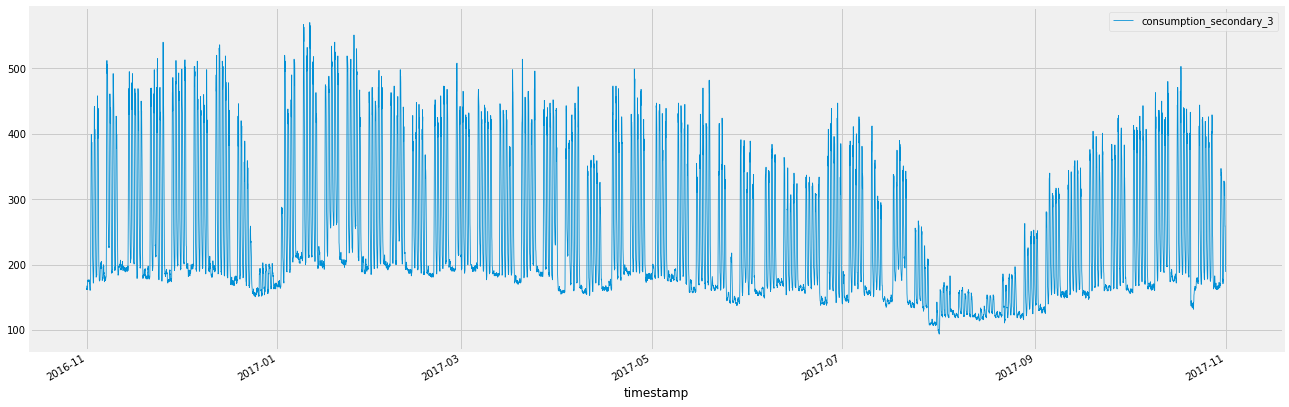

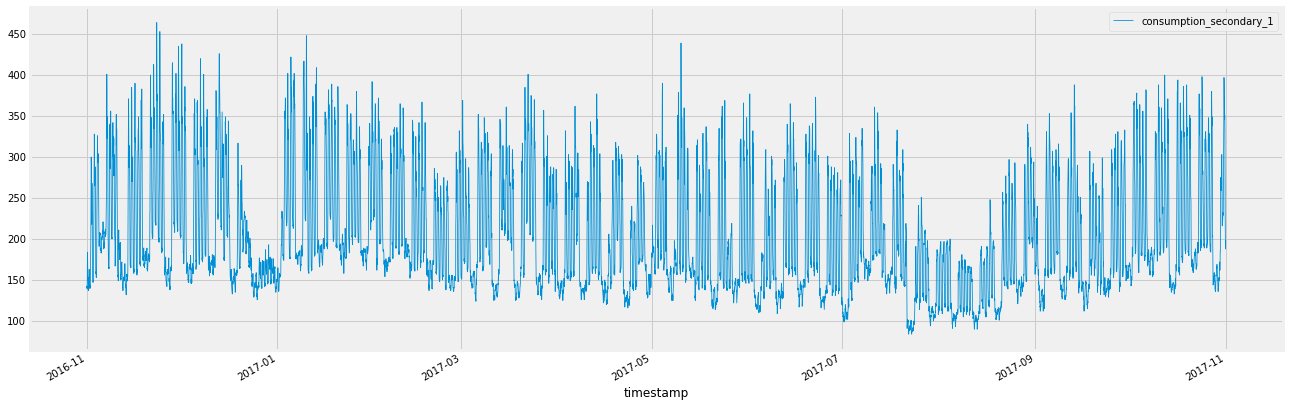

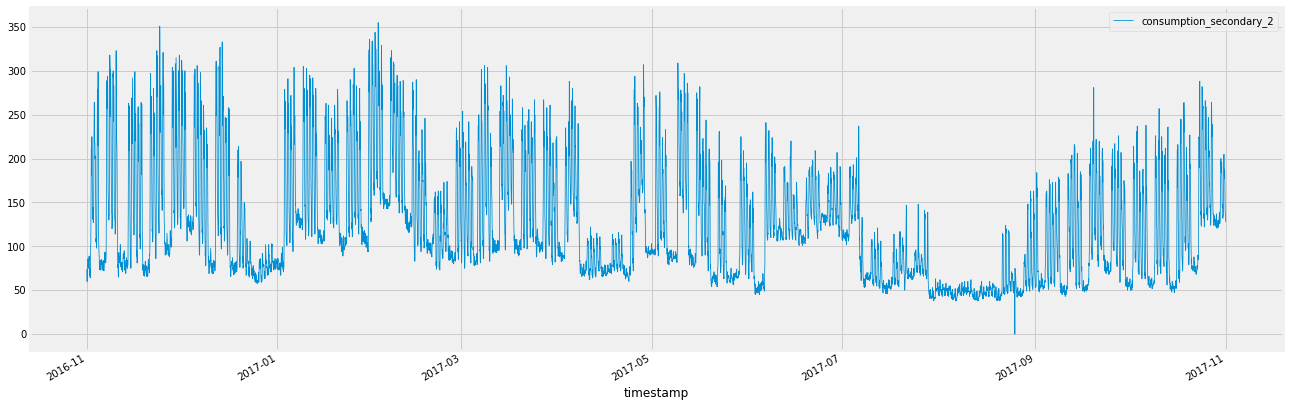

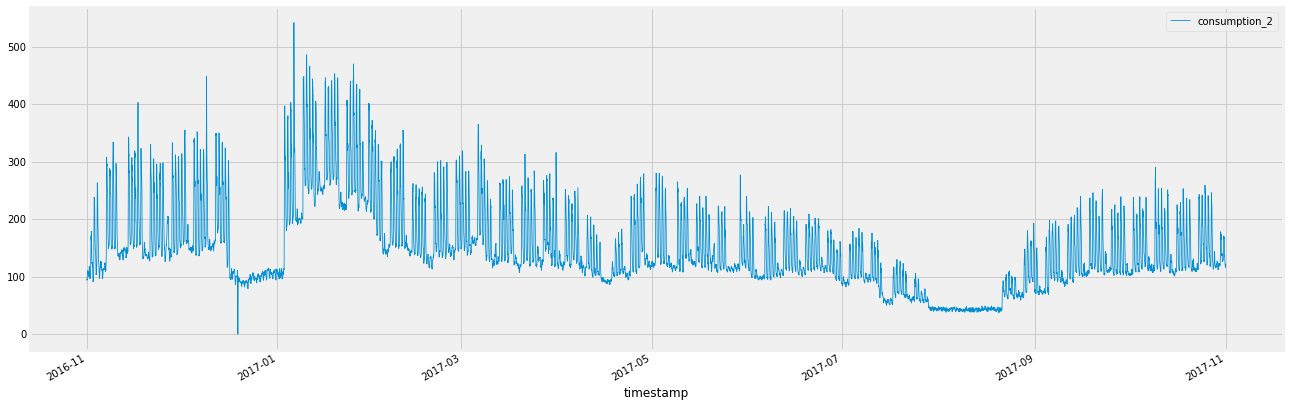

In [5]:
figparams = {'figsize':(20,7), 'lw':0.8}
data_train.plot( y='consumption_secondary_3',**figparams)
data_train.plot( y='consumption_secondary_1',**figparams)
data_train.plot( y='consumption_secondary_2',**figparams)

data_train.plot( y='consumption_2',**figparams)

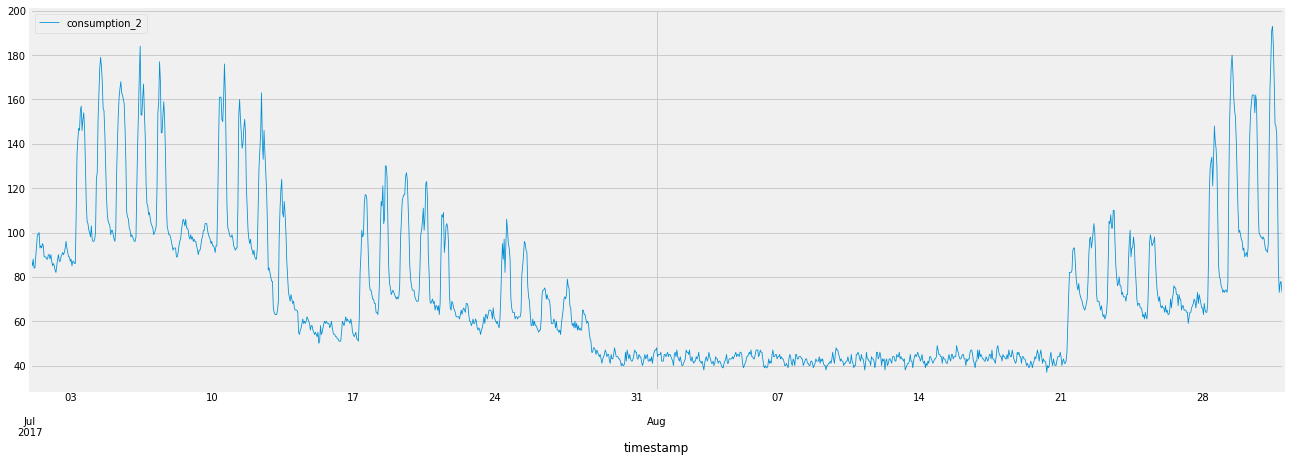

In [6]:
data_train.loc['2017-07':'2017-08'].plot( y='consumption_2',**figparams)

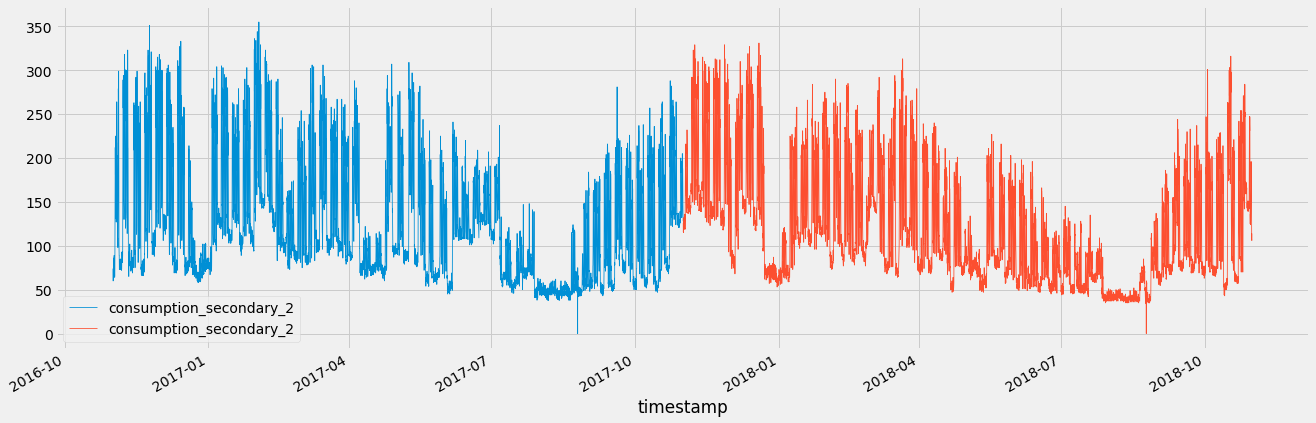

In [27]:
fig,ax=plt.subplots()
data_train.plot( y='consumption_secondary_2',**figparams,ax=ax)
data_test.plot( y='consumption_secondary_2',**figparams,ax=ax)

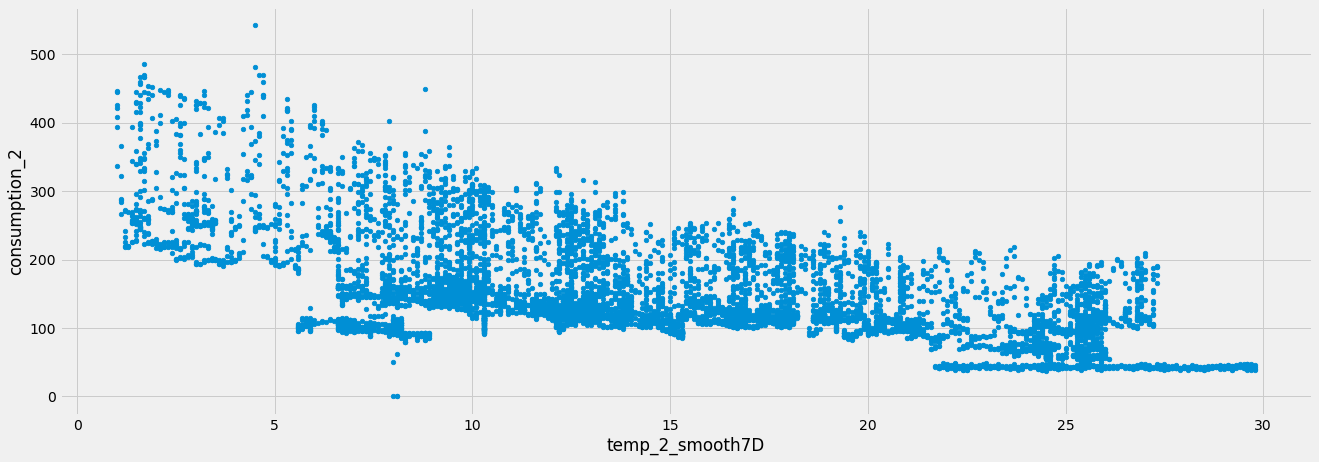

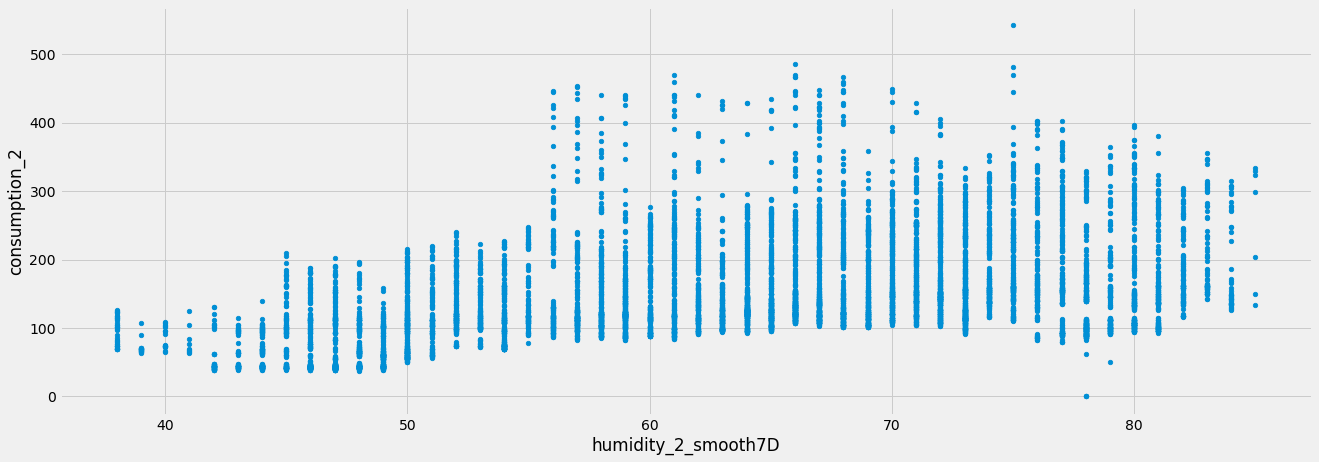

In [30]:
data_train.plot(kind='scatter', x='temp_2_smooth7D', y='consumption_2', **figparams )
data_train.plot(kind='scatter', x='humidity_2_smooth7D', y='consumption_2', **figparams )